In [2]:
# External Packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time

# Visualzation Packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import squarify
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly 
# plotly.tools.set_credentials_file(username='psn1997', api_key='ffj08tmHIdZR3dUcbBIv')

# Encoding Packages
import category_encoders as ce  #Category Encoder
from sklearn.preprocessing import LabelEncoder  #Label Encoder

# Preprocessing Packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn import svm  #SVM Model
from sklearn.tree import DecisionTreeClassifier  #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifier

# Artificial Neural Network Models
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense  #FFNN
from keras.layers.recurrent import LSTM  #RNN
from keras.layers import Embedding
from keras.optimizers import RMSprop
# from rbflayer import RBFLayer, InitCentersRandom  #RBFN 

# Evaluation Packages
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
def evaluate_model(y_true, pred):
    class_names = np.array(['0','1','2','3','4'])
    plot_confusion_matrix(y_test, pred,classes= class_names , title='Confusion matrix, without normalization')
    plt.show()
    print("Cohen Kappa Score: "+ str(cohen_kappa_score(y_test, pred)))
    print("Classification report \n" + str(classification_report(y_test, pred, target_names=class_names)))
    
    return

In [5]:
floods = pd.read_csv("database.csv", index_col=0)
np.random.seed(0)

In [6]:
viz_floods = floods.copy()
freq_floods = viz_floods['State'].value_counts()
freq_floods = freq_floods.to_frame().reset_index()
freq_floods = freq_floods.rename(columns= {"index": "State", "State":"Frequency"})

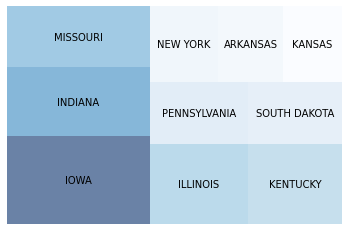

In [7]:
cmap = matplotlib.cm.Blues
mini=freq_floods['Frequency'][0:10].min()
maxi=freq_floods['Frequency'][0:10].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in freq_floods['Frequency'][0:10]]

squarify.plot(sizes=freq_floods['Frequency'][0:10], label=freq_floods['State'][0:10], alpha=.6, color=colors)
plt.axis('off')
plt.show()

In [8]:
floods_gb=floods.groupby(['State', 'Code']).size()
floods_gb = floods_gb.to_frame().reset_index()
floods_gb = floods_gb.rename(columns= {0: "Frequency"})

In [9]:
final_floods_drop = floods.copy()
final_floods_drop = final_floods_drop.dropna(subset=["Damage_Property"])
final_floods_drop = final_floods_drop.dropna(subset=["Range_Damage_Property"])
final_floods_drop = final_floods_drop.dropna(subset=["Flood_Cause"])
final_floods_drop = final_floods_drop.dropna(subset=["Begin_Lat"])
final_floods_drop = final_floods_drop.dropna(subset=["Begin_Lon"])
final_floods_drop = final_floods_drop.dropna(subset=["End_Lat"])
final_floods_drop = final_floods_drop.dropna(subset=["End_Lon"])
print(final_floods_drop.isnull().sum())

Begin_Month              0
Begin_Day                0
Begin_Year               0
Begin_Time               0
End_Date_Time            0
End_Month                0
End_Day                  0
End_Time                 0
Code                     0
State                    0
CZ_Type                  0
CZ_Name                  0
Damage_Property          0
Range_Damage_Property    0
Flood_Cause              0
Begin_Lat                0
Begin_Lon                0
End_Lat                  0
End_Lon                  0
dtype: int64


In [10]:
final_floods_ce = final_floods_drop.copy()
encoder = ce.BinaryEncoder(cols=['Flood_Cause'])
final_floods= encoder.fit_transform(final_floods_ce)

Model Training

In [11]:
X = final_floods[['Flood_Cause_0', 'Flood_Cause_1', 'Flood_Cause_2', 'Flood_Cause_3','Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon']].copy()
y = final_floods[['Range_Damage_Property']].copy()

In [12]:
# Split Data into Train & Test Data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train['Range_Damage_Property'].value_counts())
print(y_test['Range_Damage_Property'].value_counts())

(11535, 8)
(2884, 8)
(11535, 1)
(2884, 1)
0.0    6805
2.0    1719
3.0    1506
1.0    1388
4.0     117
Name: Range_Damage_Property, dtype: int64
0.0    1711
2.0     407
3.0     376
1.0     361
4.0      29
Name: Range_Damage_Property, dtype: int64


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.5932732316227461
Confusion matrix, without normalization


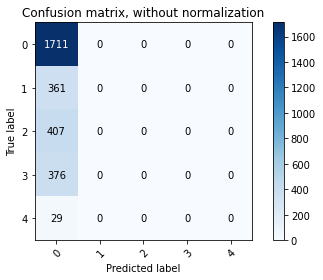

Cohen Kappa Score: 0.0
Classification report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1711
           1       0.00      0.00      0.00       361
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       376
           4       0.00      0.00      0.00        29

    accuracy                           0.59      2884
   macro avg       0.12      0.20      0.15      2884
weighted avg       0.35      0.59      0.44      2884



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Create a SVM Model
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print Model Accuracy
print(clf.predict(X_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, clf.predict(X_test))


In [14]:
#Covert classes to categorical type

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

encoded_y_train = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)

encoded_y_test = np_utils.to_categorical(encoded_Y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train on 11535 samples, validate on 2884 samples
Epoch 1/20
11535/11535 [==============================] - 1s 111us/step - loss: 1.3333 - accuracy: 0.5876 - val_loss: 1.1861 - val_accuracy: 0.5933
Epoch 2/20
11535/11535 [==============================] - 1s 86us/step - loss: 1.1810 - accuracy: 0.5901 - val_loss: 1.1706 - val_accuracy: 0.5933
Epoch 3/20
11535/11535 [==============================] - 1s 87us/step - loss: 1.1718 - accuracy: 0.5900 - val_loss: 1.1650 - val_accuracy: 0.5933
Epoch 4/20
11535/11535 [==============================] - 1s 91us/step - loss: 1.1677 - accuracy: 0.5900 - val_loss: 1.1623 - val_accuracy: 0.5933
Epoch 5/20
11535/11535 [==============================] - 1s 88us/step - loss: 1.1655 - accuracy: 0.5900 - val_loss: 1.1612 - val_accuracy: 0.5933
Epoch 6/20
11535/11535 [==============================] - 1s 102us/step - loss: 1.1644 - accuracy: 0.5900 - val_loss: 1.1600 - val_accuracy: 0.5933
Epoch 7/20
11535/11535 [==============================] - 1s 90us/s

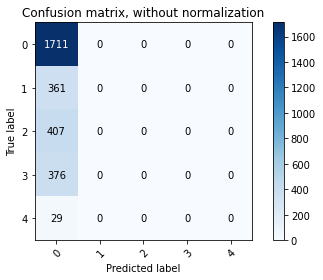

Cohen Kappa Score: 0.0
Classification report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1711
           1       0.00      0.00      0.00       361
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       376
           4       0.00      0.00      0.00        29

    accuracy                           0.59      2884
   macro avg       0.12      0.20      0.15      2884
weighted avg       0.35      0.59      0.44      2884

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 5)         

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Create Feed Forward Neural Network
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the Network
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model using the training sets
model.fit(X_train, encoded_y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, encoded_y_test))

# Print Model Accuracy
[test_loss, test_acc] = model.evaluate(X_test, encoded_y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
pred = model.predict_classes(X_test)
print(pred)

# Evaluate Model
evaluate_model(y_test, pred)

# Print Model Summary
print(model.summary())


Accuracy: 0.6605409153952844
Confusion matrix, without normalization


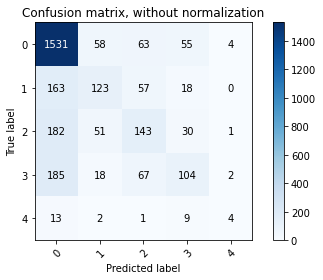

Cohen Kappa Score: 0.36717217834426885
Classification report 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1711
           1       0.49      0.34      0.40       361
           2       0.43      0.35      0.39       407
           3       0.48      0.28      0.35       376
           4       0.36      0.14      0.20        29

    accuracy                           0.66      2884
   macro avg       0.50      0.40      0.43      2884
weighted avg       0.63      0.66      0.63      2884



In [13]:
# Create Decision Tree classifer
clf = DecisionTreeClassifier(criterion="entropy", splitter="best",max_depth=11)

# Train the model using the training sets
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, y_pred)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.6778779472954231
Confusion matrix, without normalization


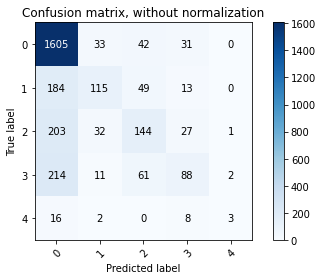

Cohen Kappa Score: 0.37144067699189887
Classification report 
              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1711
           1       0.60      0.32      0.42       361
           2       0.49      0.35      0.41       407
           3       0.53      0.23      0.32       376
           4       0.50      0.10      0.17        29

    accuracy                           0.68      2884
   macro avg       0.57      0.39      0.43      2884
weighted avg       0.65      0.68      0.64      2884



In [14]:

# Create Random Forest classifer
clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,min_samples_split=5,verbose=1)

# Train the model using the training sets
clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred=clf.predict(X_test)

# Print Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate Model
evaluate_model(y_test, y_pred)

In [15]:
#Covert classes to categorical type

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

encoded_y_train = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)

encoded_y_test = np_utils.to_categorical(encoded_Y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train on 11535 samples, validate on 2884 samples
Epoch 1/20
11535/11535 [==============================] - 1s 128us/step - loss: 1.2748 - accuracy: 0.5889 - val_loss: 1.1723 - val_accuracy: 0.5933
Epoch 2/20
11535/11535 [==============================] - 1s 88us/step - loss: 1.1705 - accuracy: 0.5901 - val_loss: 1.1636 - val_accuracy: 0.5933
Epoch 3/20
11535/11535 [==============================] - 1s 88us/step - loss: 1.1727 - accuracy: 0.5899 - val_loss: 1.1594 - val_accuracy: 0.5933
Epoch 4/20
11535/11535 [==============================] - 1s 88us/step - loss: 1.1659 - accuracy: 0.5900 - val_loss: 1.1589 - val_accuracy: 0.5933
Epoch 5/20
11535/11535 [==============================] - 1s 96us/step - loss: 1.1647 - accuracy: 0.5900 - val_loss: 1.1586 - val_accuracy: 0.5933
Epoch 6/20
11535/11535 [==============================] - 1s 103us/step - loss: 1.1628 - accuracy: 0.5901 - val_loss: 1.1583 - val_accuracy: 0.5933
Epoch 7/20
11535/11535 [==============================] - 1s 109us/

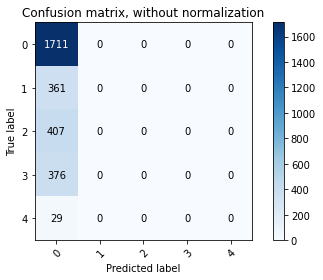

Cohen Kappa Score: 0.0
Classification report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1711
           1       0.00      0.00      0.00       361
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       376
           4       0.00      0.00      0.00        29

    accuracy                           0.59      2884
   macro avg       0.12      0.20      0.15      2884
weighted avg       0.35      0.59      0.44      2884

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 5)         

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Create Feed Forward Neural Network
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the Network
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model using the training sets
model.fit(X_train, encoded_y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, encoded_y_test))

# Print Model Accuracy
[test_loss, test_acc] = model.evaluate(X_test, encoded_y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
pred = model.predict_classes(X_test)
print(pred)

# Evaluate Model
evaluate_model(y_test, pred)

# Print Model Summary
print(model.summary())

In [17]:
model.save("FNN.h5")